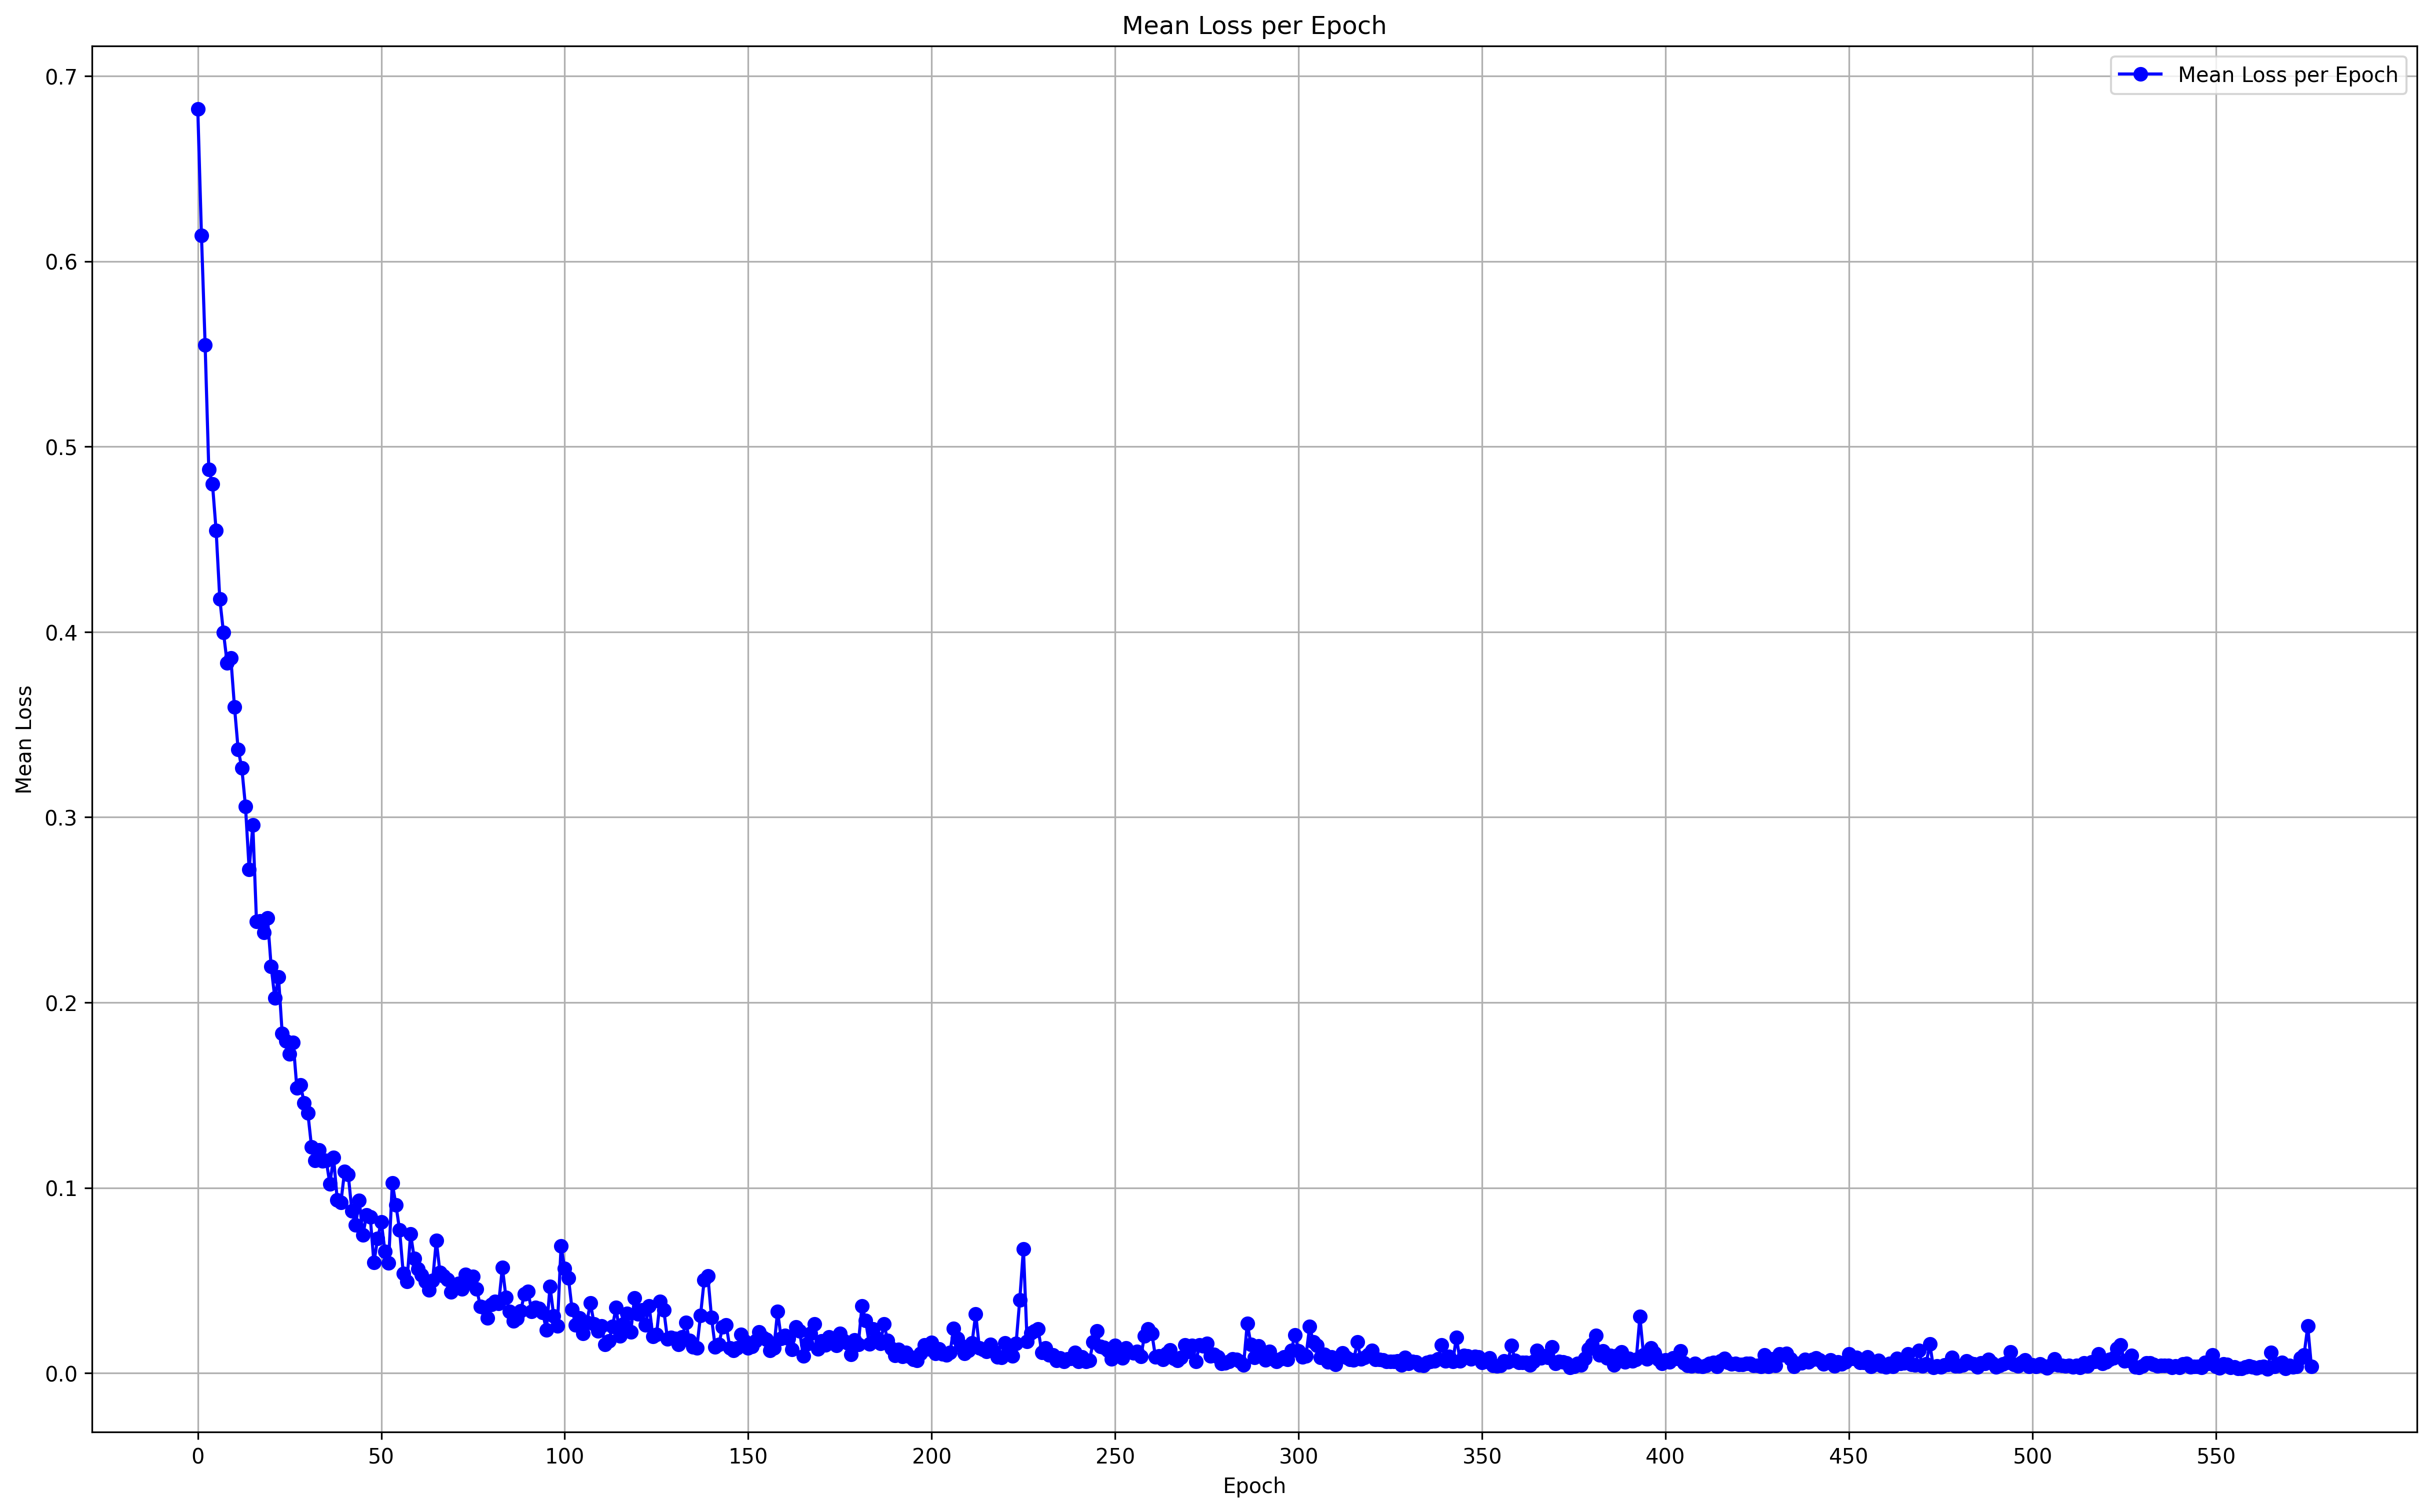

In [13]:
import re
import matplotlib.pyplot as plt

with open('/home/fuli/my_code/git/chemprop/checkpoints/Environments/cla/Environments_model/verbose.log', 'r')as f:
    epoch_losses = {}
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 50))

plt.show()
